# Data Visualization, Exploratory Data Analysis (Milestone 1)

In this notebook, we will have two main objectives:
1. Take a look at all the data we have
2. Pre-processing so that the data are more usable in our future visualisation

Recall that all our data consists of the following datasets (we will mention which one we use in each subpart)
- [Harry Potter Collection](https://github.com/theDavidBarton/the-harry-potter-database) contains a lot of information about characters, potions, spells and books. 
- We enhance the book dataset (in the previous bullet) with more information about [sales](https://en.wikipedia.org/wiki/List_of_best-selling_books) and [translations](https://en.wikipedia.org/wiki/Harry_Potter_in_translation)
- [Harry Potter network](https://github.com/dpmartin42/Networks/tree/master/Harry%20Potter) describing the network of interactiosn between characters.
- [Harry Potter Books content](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter) containing the texts of all the Harry Potter books. 
- [Harry Potter movies](https://www.kaggle.com/kornflex/harry-potter-movies-dataset) containing information about the movies as well as the transcript that can be useful for advanced analysis.
- Top 40 favourite Harry Potter characters based on [this article ](https://www.theguardian.com/childrens-books-site/2011/aug/30/snape-favourite-harry-potter-character).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helper.constantes import *

## Exploring [Harry Potter Collection dataset](https://github.com/theDavidBarton/the-harry-potter-database)

The Harry Potter collection dataset consists of a lot of information about characters, spells and potions in the Harry Potter series. We will start by exploring its character subpart.

In [2]:
df_hp_chars = pd.read_json(hpcollection_folder+"characters.json").drop(columns=['id'],axis=1) # Drop id columns as we do not use it

In [3]:
df_hp_chars[df_hp_chars['name']=='Bellatrix Lestrange'].head(2)

,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in
575,Bellatrix Lestrange,1951,"2 May, 1998 (aged 46 - 47)",Human,Pure-blood,Female,Black,None,"12¾"", Walnut, dragon heartstring",None,House of Black,[],"[4, 5, 6, 7]"


### Exploring the characters

In [4]:
df_hp_chars['name'].count()

707

In the dataset, we can see that there are 707 different characters. We will see the number of recurrent characters throughout the book series. 

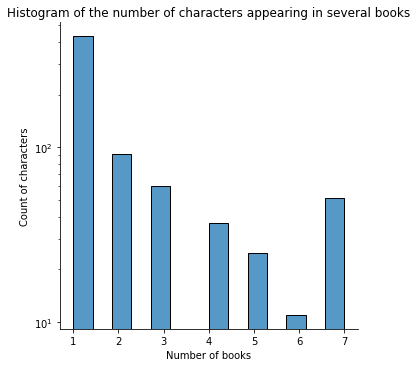

In [5]:
df_hp_chars['nb_books_featured_in'] = df_hp_chars['books_featured_in'].apply(lambda x: len(x))

fig = sns.displot(df_hp_chars['nb_books_featured_in'])
plt.title("Histogram of the number of characters appearing in several books")
plt.xlabel("Number of books")
plt.ylabel("Count of characters")
plt.yscale('log')
plt.show()

In [6]:
df_hp_chars['nb_books_featured_in'].value_counts()

1    431
2     92
3     60
7     51
4     37
5     25
6     11
Name: nb_books_featured_in, dtype: int64

Note that the y-axis is in log-scale. We can see that there a lot of characters (aroung 2/3) appear in only one book. Another interesting insight is that we have more characters appearing in all the books than characters appearing in only 4,5 or 6 books. 

#### Gender

We first take a look at the different type of gender there are in books.

In [7]:
df_hp_chars['gender'].value_counts()

Male                  437
Female                244
Males                   4
Male (likely)           2
Females                 2
Females, Males          1
Males and females       1
At least one boy        1
Male (most likely)      1
Female (likely)         1
Name: gender, dtype: int64

For the purpose of our visualisations and since the number of exceptions is very small, we will map the gender which are not male or female to their closest gender. 

In [8]:
def map_to_closest_gender(gender):
    """
    Map the gender to its closest gender 
    Parameters:
    -----------
        - gender: the gender of the characters
    Return:
    -----------
        - the standardise gender
    """
    if gender is None: 
        return None
    if "female" in gender.lower() or "girl" in gender.lower():
        return "Female"
    else:
        return "Male"
    
df_hp_chars['gender'] = df_hp_chars['gender'].apply(map_to_closest_gender)

In [9]:
def plot_pie(df, column):
    """
    Plot a pie chart for the values on the given column
    Parameters:
    -----------
        - df: the data source 
        - column: the column on which we want to do the pie chart.
    """
    data = df[column].value_counts().values
    labels = df[column].value_counts().index

    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    fig = plt.figure(figsize=(8,6))
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title("Pie chart repartition "+ column)
    plt.show()

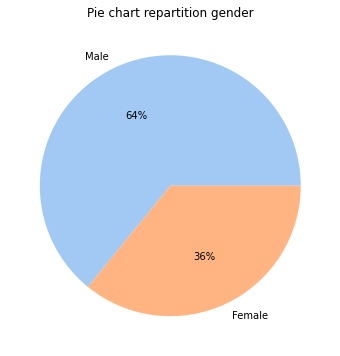

In [10]:
plot_pie(df_hp_chars, "gender")

We can see that around 2/3 of the characters in this Harry Potter are men and 1/3 are women. Let see what are the genders of the recurrent characters in the Harry Potter serie. 

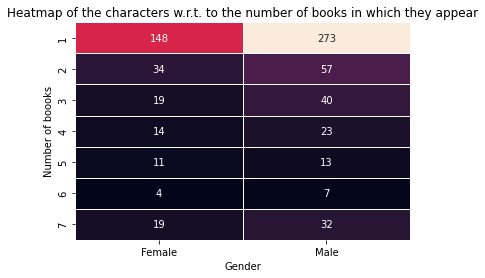

In [11]:
# Create a heatmap with cross count of the by number of books featured in and gender 
sns.heatmap(pd.crosstab(df_hp_chars['nb_books_featured_in'],df_hp_chars['gender']), annot=True, fmt="d", linewidths=.5, cbar=False)
plt.title('Heatmap of the characters w.r.t. to the number of books in which they appear')
plt.xlabel('Gender')
plt.ylabel('Number of boooks')
plt.show()

As we can see, males are around 1.5 or twice more present than female in each category. This could introduces some biases in our subsequent analysis or visualisations. We must be careful.

#### Houses

When a new wizard goes to Hogwarts to learn how to use magic, (s)he will first be splitted into one of the 4 houses: Gryffindor, Ravenclaw, Slytherin or Hufflepuff. 

We will now take a look at our character list and see from which houses they come from. 

In [12]:
df_hp_chars['house'].value_counts()

Gryffindor                                       56
Slytherin                                        37
Ravenclaw                                        29
Hufflepuff                                       23
House of Black                                    9
Gryffindor (possibly)                             3
Slytherin (possibly)                              3
Unknown                                           3
House of Gaunt                                    2
Gryffindor, Hufflepuff, or Slytherin              2
Ravenclaw (possibly)                              2
Malfoy family                                     2
House of Black (formerly)                         2
Gryffindor (likely)                               2
Slytherin (likely)                                2
Hufflepuff (likely)                               2
Riddle family (formerly)                          1
Hufflepuff (possibly)                             1
Lord Voldemort                                    1
Hogwarts Sch

We can see that unfortunately, they are a lot more houses than the 4 expected. We will have to do data cleaning in order to fall back in the data format we format. From the above data, even He-Who-Must-Not-Be-Named seems to have created a new house containing only one person... 

In [13]:
df_hp_chars[df_hp_chars['house']=='Lord Voldemort'].head(10)

,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in,nb_books_featured_in
241,Rodolphus Lestrange,Pre 1964,None,Human,Pure-blood,Male,Dark,Dark,None,None,Lord Voldemort,[],"[4, 5, 7]",3


Rodolphus Lestrange is in fact one of the most death eather serving Lord Voldemort, it is also known that it belongs to the Slytherin house, we will correct this in a global function later. Another choice that we made is the fact that for all *likely/possibly* houses, we will remove the probably and put them in the house. The next interesting thing is that the basilisk (which is a snake) seems to belong to an house, we will remove this from the house column and put in the associated groups later. 

In [14]:
df_hp_chars[df_hp_chars['house']=='Salazar Slytherin'].head(10)

,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in,nb_books_featured_in
653,Serpent of Slytherin,c. 993,"29 May, 1993 (aged around 1000)",Basilisk,None,Female,None,Yellow,None,None,Salazar Slytherin,[],"[2, 3, 4, 5, 6, 7]",6


The same thing will happen to people belonging to the House of Gaunt that do not attend any course at Hogwarts.

Phineas Nigellus Black is a wizard belonging to the Slytherin house and become later headmaster of Hogwarts, we will also correct this issue. All humans from the Black family are known to belong to the Slytherin house (except Sirius =D, but it is not considered as member of the House of Black by the dataset), we will therefore also move them into the corresponding house. Similarly, all the members of the Malfoy family are known to belong the Slytherin house. The other cases which we do not discussed are negligible and their houses will simply be removed.

Note that for this part, we did not have any other choice than inspecting the cases one by one and to take a decision to improve our data. That's the reason why in the above cells, we add known and verified association as well as cleaning as explained above. 

In [15]:
def custom_association(name, house, assoc):
    """
    Add custom, known and meaningful associations from the Harry Potter saga for some character of the Harry Potter saga
    Parameters:
    -----------
        - name: the name text field in a row of the dataframe        
        - house: the house text field in a row of the dataframe
        - assoc: the associated_groups in a row of the dataframe
    Return:
    -----------
        - the list of associations including the custom one
    """
    if house == "House of Gaunt":
        return assoc + ["House of Gaunt"]
    elif house == "House of Gaunt (abandoned)":
        return assoc + ["House of Gaunt","Riddle family"]
    elif name == "Tom Riddle (Voldemort)":
        return assoc + ["Lord Voldemort","House of Gaunt", "Riddle family", "Hogwarts School of Witchcraft and Wizardry"]
    elif name == "Narcissa Malfoy":
        return assoc + ["House of Black",'Malfoy family', "Hogwarts School of Witchcraft and Wizardry"]
    elif name == "Bellatrix Lestrange":
        return assoc + ["House of Black",'Malfoy family', "Hogwarts School of Witchcraft and Wizardry"]
    elif house == "House of Black":
        return  assoc+["House of Black"]
    elif house == 'House of Black (formerly)':
        return  assoc+["House of Black"]
    elif house == 'Malfoy family':
        return  assoc+['Malfoy family']
    elif house == "Riddle family (formerly)":
        return  assoc+["Riddle family"]
    elif house == "Hogwarts School of Witchcraft and Wizardry":
        return  assoc+["House of Black"]
    else:
        return assoc

def format_house(house):
    """
    Clean the house columns of the dataframe so that there are only the 4 expected houses remaining.
    Parameters:
    -----------
        - house: the house text field in a row of the dataframe
    Return:
    -----------
        - the formatted house name
    """
    if house is None:
        return None
    if house == "Lord Voldemort" or house=='Hogwarts School of Witchcraft and Wizardry': 
        return "Slytherin"
    elif "Hufflepuff" in house:
        return "Hufflepuff"
    elif "Gryffindor" in house:
        return "Gryffindor"
    elif "Slytherin" in house or "House of Black" in house:
        return "Slytherin"
    elif "Ravenclaw" in house:
        return "Ravenclaw"
    else: 
        return None
    
def add_house_as_association_if_not_already(house, assoc):
    """
    Add the house of characters as an association if it is not already done
    Parameters:
    -----------
        - house: the house text field in a row of the dataframe
        - assoc: the associated_groups field in a row of the dataframe
    Returns:
    -----------
        - the list of association including the house of the character
    """
    if house is None:
        return assoc
    else: 
        if 'Hogwarts School of Witchcraft and Wizardry' in assoc:
            return assoc if house in assoc else assoc +[house]
        else:
            return assoc if house in assoc else assoc +[house,'Hogwarts School of Witchcraft and Wizardry']
        

In [16]:
# Add custom associations
df_hp_chars['associated_groups'] = df_hp_chars.apply(lambda x: custom_association(x['name'], x['house'], x['associated_groups']),axis=1)
# Format the house name of the characters
df_hp_chars['house'] = df_hp_chars['house'].apply(format_house)
# Add house as an association for each character
df_hp_chars['associated_groups'] = df_hp_chars.apply(lambda x: add_house_as_association_if_not_already(x['house'], x['associated_groups']),axis=1)

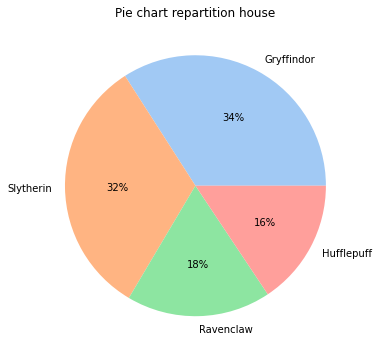

In [17]:
plot_pie(df_hp_chars, "house")

By reading the books, we kind of have the feeling that we are introduced to a lot of Gryffindor people (as the good people) and a lot of Syltherin guys (as the bad people). So it is natural that the majority of the characters came from these two houses. Nevertheless, we were suprised to have such a high number of characters in the two remaining houses but it is a really good thing. It is possible that our visualisation would have made less sense if the distribution of the characters over the houses was almost inexistent for the two other houses. 

#### Wands

We wil now explore the different known wands from the Harry Potter series. The wand is really the tool making people specials. The wands have different sizes, cores and wood types. One of our idea of interactive visualiation will be to propose to the user to choose components of the wand and display to him/her the closest character in terms of wand components. 

In [18]:
df_wands = pd.read_json(hpcollection_folder+"wand.json")
df_wands.shape

(27, 5)

We can see that despite the high number of characters (707) introduced in the book series, we only know the wand composition of 27 of them. For our interactive visualisation, this can be a bit limiting. However, the known wands are probably the ones of the most famous characters, we hope that it will do the job. 

In [19]:
df_hp_chars = df_hp_chars.merge(df_wands, how='left',left_on='name', right_on='name').drop('wand', axis=1)
df_hp_chars.head(1)

,name,birth,death,species,ancestry,gender,hair_color,eye_color,patronus,house,associated_groups,books_featured_in,nb_books_featured_in,wood,length,core,Note
0,Euan Abercrombie,between 1 September 1983 and 31 August 1984,None,Human,None,Male,None,None,None,Gryffindor,"[Hogwarts School of Witchcraft and Wizardry, G...",[5],1,NaN,NaN,NaN,NaN


In the above cell, we merge the wand information into the characters dataframe so that we have all the information in the same place. Let's now have a look at the different components of the wand. 

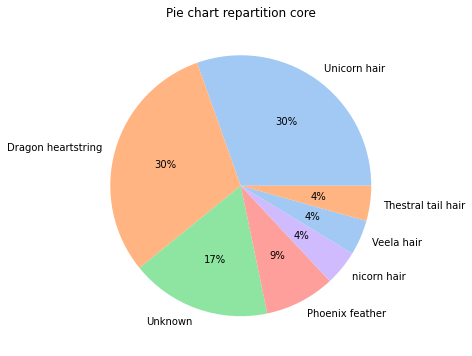

In [20]:
plot_pie(df_hp_chars, "core")

 Although this is quite obvious it is still important to notice that the 3 components used by Ollivander (the London wand maker) are the most popular in the saga. This makes sense as Ollivander is one of the most famous wand maker as well as the closet place where Hogwarts students can buy a wand. To continue with the wand analysis, we will quickly inspect the diferent type of woods used. 

In [21]:
df_hp_chars['wood'].value_counts()

Ash         2
Cherry      2
Willow      1
Yew         1
Larch       1
Birch       1
Hazel       1
Fir         1
Walnut      1
Vine        1
Rosewood    1
Cedar       1
Alder       1
Mahogany    1
Holly       1
Chestnut    1
Hornbeam    1
Elm         1
Hawthorn    1
Cypress     1
Elder       1
Name: wood, dtype: int64

From the above counts, we can see that the known wand mostly have different woods, this is a great news for our interactive visualisation as this means that choosing a wood will drastically constraint the set of similar characters. 

#### Physical traits

Another interesting feature of this dataset is the physical characteristics such as the eye and hair color that might be available for some characters. Let us first see for how many information we have on the characters. 

In [22]:
df_hp_chars.loc[:,['eye_color', "hair_color"]].count()

eye_color     144
hair_color    282
dtype: int64

Among the 707 characters, we have "only" information for 144 of them about the eye and 282 about the hairs. We will just look at the distribution of the different hair and eye colors.

In [23]:
df_hp_chars['eye_color'].value_counts()

Blue                                25
Brown                               23
Green                               18
Dark                                18
Black                               15
Grey                                 8
Yellow                               5
Bright brown                         3
Bright green                         2
Hazel                                2
Orange                               1
Dark grey                            1
Yellow and lamp-like                 1
Pale silvery (possibly)              1
Pale silvery                         1
Dark green                           1
Amber                                1
"Gimlet-eyed"                        1
Dark blue                            1
Gooseberry                           1
Yellowish                            1
Scarlet (formerly dark brown)        1
Bottle green                         1
Grey/Blue                            1
Black & Grey/Milky-White (Blind)     1
Silvery                  

In [24]:
df_hp_chars['hair_color'].value_counts()

Black                      45
Brown                      38
Grey                       24
Dark                       22
Blonde                     21
                           ..
Brown and white             1
Brown/greying               1
Red brown                   1
Tawny                       1
Silver, formerly auburn     1
Name: hair_color, Length: 70, dtype: int64

As we can see, there are a really huge amount of eye and hair colors (35 and 70). So, it will be hard to extract anything useful for a visualisation. What we will probably do is just display these information under the "personal page" of each character. 

#### Blood types

In Harry Potter, the blood type is something important for the antagonists of the Boy-Who-Lived which want the population of being made of Pure or Half-blood, even though most of the characters don't care about the blood ascendent of others.

It might be interesting to see the distribution of blood types over the characters. Furthermore, since one of our visualisations will probably be based on the blood types, it is important to check what data we got. 

In [25]:
def format_blood_type(blood):
    """
    Format the given blood type string
    Parameters:
    -----------
        - blood: the blood text fielf of the dataframe
    Returns:
    -----------
        - the formatted blood type
    """
    if blood is None or "Magical to some extent" == blood or blood == "Magical to unknown extent" or "Underbeing"==blood: 
        return None
    if "pure-blood or half-blood" in blood.lower() or "half-blood or pure-blood" in blood.lower() or "Pure blood or Half-blood" == blood:
        return "Pure-blood or Half-blood"
    elif "Muggle-born or half-blood" == blood:
        return "Muggle-born or Half-blood"
    elif "muggle-born" in blood.lower():
        return "Muggle-born"
    elif "squib" in blood.lower():
        return "Squib"
    elif "Part-Human (Half-giant)" == blood: 
        return "Part-Human (Half-giant)"
    elif "pure-blood" in blood.lower(): 
        return "Pure-blood"
    elif "half-blood" in blood.lower():
        return "Half-blood"
    elif "Muggle" == blood or "Muggles" == blood:
        return "Muggle"
    else:
        return blood
    

The above function will just map the blood type string to the same baseline (with the same upper and lower case) so that it is easier to group them. 

In [26]:
df_hp_chars['ancestry'] = df_hp_chars['ancestry'].apply(format_blood_type)
df_hp_chars['ancestry'].value_counts()

Pure-blood or Half-blood     100
Muggle                        74
Pure-blood                    73
Half-blood                    32
Muggle-born                   15
Squib                          8
Muggle-born or Half-blood      2
Part-Human (Half-giant)        2
Quarter-Veela                  2
Part-Goblin                    1
Giant                          1
Half-Veela                     1
One-eighth Veela               1
Name: ancestry, dtype: int64

So we can see that most of the characters are humans and most of them belong to the Wizarding world (i.e. they are not muggles). Interestingly, we can see that muggle characters are well-represented throughout this dataset with 74 people. Note that people mark as 1/8, 1/4 and 1/2 Veela correspond to humans, in fact they precisely belong to the same french family Delacourt. We can see that we have a very rich and diverse dataset in terms of blood types. 

As we planned to make some kind of Sankey Diagram between the preferred characters and their blood types, such a diversity will give a lot of sense to our visualisation. 

#### Species

One last thing before exploring the connection between characters is to check whether they are human or not. If not, how many of them represent other types of creatures... 

In [27]:
df_hp_chars['species'].value_counts()

Human                                      589
Human (formerly)                            11
Goblin                                       7
House-elf                                    7
Giant                                        6
Human (Seer)                                 4
Centaur                                      4
Humans                                       4
Human (Veela ancestry)                       2
Vampire                                      2
Human (Metamorphmagus)                       2
Werewolf (formerly Human)                    2
Acromantula                                  2
Ghoul                                        1
Werewolf                                     1
Veela or part-Veela                          1
Half-Human                                   1
Veela                                        1
Toad                                         1
1/4 Veela                                    1
Thestral                                     1
Human (Werewo

We can see that there are a lot of different species. We will try to group them in smaller subgroups so that our subsequent analyses will be easier. Our choices included: 
- Transform Human (formerly) as Ghost as they all correspond to humans. We also choose to group all the human into the Human group and not having subcategory anymore. 
- Put all types of owl in one group, similar for the dog, half-human/half-giant snake and werevolves.
- For the iconic character, we keep their species.
- For characters with a super specific specy such as Part-Kneazle cat or Peacock which doesn't correspond to a well known characters, we choose to remove their species in order to keep all the things simple. 

In [28]:
def format_species(species):
    """
    Format the species field from the characters dataframe
    Parameters:
    -----------
        - species: the species text field from the dataframe
    Returns:
    -----------
        - Th formatted species field
    """
    if species is not None:
        if species in ["Screech owl","Great grey owl","Scops owl","Owl","Snowy Owl"]:
            return "Owl"
        elif species in ["Half-Human/Half-Giant","Half-human/Half-giant"]:
            return "Half-Human/Half-Giant"
        elif species in ["Three-headed dog","Boarhound","Dog (breed: bulldog)"]:
            return "Dog"
        elif species in["Human (Goblin ancestry)","1/4 Veela", "Human (Metamorphmagus)","Human (Veela ancestry)","Humans","Human (Seer)","Human"]:
            return "Human"
        elif species in ["Phoenix", "Ghost","Poltergeist","Hippogriff","Basilisk","Cat","Norwegian Ridgeback","Thestral","Acromantula","Centaur","Giant","House-elf","Goblin"] :
            return species
        elif species == "Human (formerly)":
            return "Ghost"
        elif species in ["Portrait; formerly Human", "Portrait"]:
            return "Portrait"
        elif species == "Human (Maledictus affliction; formerly)":
            return "Snake"
        elif species =="Werewolf (formerly Human)":
            return "Human-werevolf"
    return None
    

In [29]:
df_hp_chars['species'] = df_hp_chars['species'].apply(format_species)
df_hp_chars['species'].value_counts()

Human                    603
Ghost                     12
Goblin                     7
House-elf                  7
Giant                      6
Owl                        5
Centaur                    4
Dog                        3
Acromantula                2
Human-werevolf             2
Half-Human/Half-Giant      2
Portrait                   2
Hippogriff                 1
Phoenix                    1
Poltergeist                1
Thestral                   1
Snake                      1
Norwegian Ridgeback        1
Cat                        1
Basilisk                   1
Name: species, dtype: int64

With all the processing, we end-up with a shorter list of species which makes more sense.

#### Association between characters

We will now come to the biggest part of this data exploration. The Harry Potter Collection provides information from the [fandom wiki page](https://harrypotter.fandom.com/wiki/) of the characters. In this dataset, we will consider that two characters have a relation if both of them have at least one group in common (in the section "associated groups" on the fandom wikia page).

However, we wanted to go one step further and see the interaction between characters. We find a [Harry Potter characters network](https://github.com/dpmartin42/Networks/tree/master/Harry%20Potter) which has already done that for us. In this dataset, they chose to scrap the wiki page of each character and if the name of another character appears (as a hyperlink), they said that the two characters interact. So in this second version of the visualisation, we will have a graph at the "character level" and not at the "association level". 

Note that, there were inconsistences between the name of the characters in the two datasets. To take care of this, we had to pre-process the network dataset by hand so that the we get the same name.

In [30]:
df_networks = pd.read_json(hp_network_folder+"network.json").drop(columns=["color", "x", "size", "y", "connection_link", "originalColor"],axis=1)

The columns we are dropping are method related to the network they build. Since we will probably have to rebuild one on our own to match the needs of D3, we choose to drop them. 

In [31]:
df_networks.head(2)

,id,label,link,link_image,connection_label
0,0,Hannah Abbott,Hannah_Abbott,http://img3.wikia.nocookie.net/__cb20091229012...,"[Albus Dumbledore, Alecto Carrow, Alicia Spinn..."
1,1,Ludovic Bagman,Ludo_Bagman,http://img1.wikia.nocookie.net/__cb20111028215...,"[Alastor Moody, Augustus Rookwood, Bartemius C..."


In [32]:
df_networks['link_image'].count(), df_networks.shape

(176, (176, 5))

In [33]:
df_networks.head(50)

,id,label,link,link_image,connection_label
0,0,Hannah Abbott,Hannah_Abbott,http://img3.wikia.nocookie.net/__cb20091229012...,"[Albus Dumbledore, Alecto Carrow, Alicia Spinn..."
1,1,Ludovic Bagman,Ludo_Bagman,http://img1.wikia.nocookie.net/__cb20111028215...,"[Alastor Moody, Augustus Rookwood, Bartemius C..."
2,10,Lavender Brown,Lavender_Brown,http://img2.wikia.nocookie.net/__cb20110719012...,"[Alastor Moody, Albus Dumbledore, Alicia Spinn..."
3,100,Antioch Peverell,Antioch_Peverell,http://img3.wikia.nocookie.net/__cb20110119192...,"[Cadmus Peverell, Harry Potter, Ignotus Peverell]"
4,101,Cadmus Peverell,Cadmus_Peverell,http://img2.wikia.nocookie.net/__cb20110119200...,"[Albus Dumbledore, Antioch Peverell, Harry Pot..."
5,102,Ignotus Peverell,Ignotus_Peverell,http://img1.wikia.nocookie.net/__cb20110119191...,"[Albus Dumbledore, Antioch Peverell, Bathilda ..."
6,103,Irma Pince,Irma_Pince,http://img3.wikia.nocookie.net/__cb20111128202...,"[Albus Dumbledore, Alecto Carrow, Amycus Carro..."
7,104,Sturgis Podmore,Sturgis_Podmore,http://img1.wikia.nocookie.net/__cb20141031171...,"[Alastor Moody, Albus Dumbledore, Cornelius Fu..."
8,105,Poppy Pomfrey,Poppy_Pomfrey,http://img1.wikia.nocookie.net/__cb20131110073...,"[Albus Dumbledore, Alecto Carrow, Amycus Carro..."
9,106,Harry Potter,Harry_Potter,http://img2.wikia.nocookie.net/__cb20140619173...,"[Aberforth Dumbledore, Alastor Moody, Albus Du..."


As we can see, another important thing is the fact that we get a link image for the face of all the characters. This will be an important component to build some of our visualisations starring the different characters.

In [34]:
df_net = df_hp_chars.merge(df_networks, left_on="name", right_on="label",how="inner")
set(df_networks.id.values)-set(df_net.id.values)

set()

The two above cells are just there to show that we manage to pre-process by hand the dataset in order to match all the characters between the datasets and that we do not lose any data. We can therefore merge everything in our main dataframe. Note that the network dataset contains around 3 times less characters, i.e. it contains probably only the most popular one. However, since the final product will be a visualiation, we will keep the smaller number of characters (still 176) so that we have a more manageable size for the number of characters to show in the visualisation.

In [35]:
df_hp_chars = df_hp_chars.merge(df_networks, left_on="name", right_on="label",how="inner")
df_hp_chars.shape

(177, 22)

This is weird, we had 176 characters in the network dataframe and we end up with 177 rows. This probably means that we have one character appearing twice in the character dataframe. 

In [36]:
df_hp_chars[df_hp_chars.duplicated(subset='name')]

,name,birth,death,species,ancestry,gender,hair_color,eye_color,patronus,house,...,nb_books_featured_in,wood,length,core,Note,id,label,link,link_image,connection_label
137,Hedwig,Middle Ages,Middle Ages,Human,None,Female,None,None,None,None,...,1,NaN,NaN,NaN,NaN,165,Hedwig,Hedwig,http://img1.wikia.nocookie.net/__cb20100708114...,"[Arthur Weasley, Dobby, Dolores Umbridge, Ginn..."


Indeed, we can see that Hedwig appears twice. We will remove it and continue our analysis.

In [37]:
df_hp_chars.drop_duplicates(subset='name', keep='first', inplace=True)
df_hp_chars.reset_index(drop=True,inplace=True)
df_hp_chars.shape

(176, 22)

Now that we have merged everything together, we will start by seeing the empirical distribution of the number of association for each character. We start by computing the number of association and the number of iteration for each characters. 

In [38]:
import math
df_hp_chars['nb_associations'] = df_hp_chars['associated_groups'].apply(lambda x: 0 if np.nan == x else len(x))
df_hp_chars['nb_interactions'] = df_hp_chars['connection_label'].apply(lambda x:  0 if type(0.0)==type(x) and  math.isnan(x) else len(x))

In [39]:
# save the characters dataframe for later use
df_hp_chars.to_json( cleaned_folder+"all_chars.json", orient='index')

<Figure size 720x432 with 0 Axes>

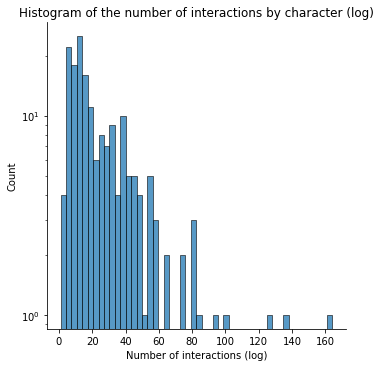

In [40]:
fig = plt.figure(figsize=(10,6))
sns.displot(df_hp_chars['nb_interactions'], log=(True,True),bins=50)
plt.title("Histogram of the number of interactions by character (log)")
plt.xlabel("Number of interactions (log)")
plt.show()

The first remark we can make is that we cannot assert that the graph is undirected since a link from the page of a character to another one doesn't guarantee that the reverse link exists. The above histogram therefore corresponds to the out-degree distribution of the characters in the network. We can see that it seems to match one of network most famous' distributions, a power law. Indeed, we can see that the empirical distribution almost form a line in a log-log plot which is a characteristic of a power law' distribution function. Furthermore, it is known that an interesting property of the distribution is that extreme-value are rare but not to rare since most of the characters are located before 100 and some of them after. 

In [41]:
df_hp_chars[df_hp_chars['nb_interactions']>90]

,name,birth,death,species,ancestry,gender,hair_color,eye_color,patronus,house,...,length,core,Note,id,label,link,link_image,connection_label,nb_associations,nb_interactions
84,Harry Potter,"31 July, 1980",None,Human,Half-blood,Male,Jet-black,Bottle green,Stag,Gryffindor,...,11.00,Phoenix feather,Brother to Voldemort's wand — the core tail fe...,106,Harry Potter,Harry_Potter,http://img2.wikia.nocookie.net/__cb20140619173...,"[Aberforth Dumbledore, Alastor Moody, Albus Du...",13,164
98,Severus Snape,9 January 1960,2 May 1998 (aged 38),Human,Half-blood,Male,Black,Black,Doe,Slytherin,...,NaN,NaN,NaN,126,Severus Snape,Severus_Snape,http://img2.wikia.nocookie.net/__cb20140619181...,"[Aberforth Dumbledore, Alastor Moody, Albus Du...",10,94
108,Ronald Weasley,"1 March, 1980",None,Human,Pure-blood,Male,Red,Blue,Jack Russell terrier,Gryffindor,...,14.00,Unicorn hair,Purchased with his father's winnings from a Da...,147,Ronald Weasley,Ron_Weasley,http://img2.wikia.nocookie.net/__cb20140425121...,"[Aberforth Dumbledore, Alastor Moody, Albus Du...",14,99
134,Hermione Granger,"19 September, 1979",None,Human,Muggle-born,Female,Brown,Brown,Otter,Gryffindor,...,10.75,Dragon heartstring,This wand was confiscated when the trio was ca...,59,Hermione Granger,Hermione_Granger,http://img2.wikia.nocookie.net/__cb20101104204...,"[Aberforth Dumbledore, Alastor Moody, Albus Du...",12,125
175,Albus Dumbledore,Late August 1881,"30 June, 1997 (aged 115)",Human,Half-blood,Male,"Silver, formerly auburn",Blue,Phoenix,Gryffindor,...,15.00,Thestral tail hair,"The Elder Wand, one of the Deathly Hallows. Al...",35,Albus Dumbledore,Albus_Dumbledore,http://img3.wikia.nocookie.net/__cb20140619180...,"[Aberforth Dumbledore, Alastor Moody, Alecto C...",12,137


As we would have expected, these extreme values correspond to extremely important characters in the whole saga, i.e. the main characters. What we just looked at is the graph of interaction between characters. We will now enter the world of associations. In this new graph, any two nodes have a link if they have at least one association in common. 

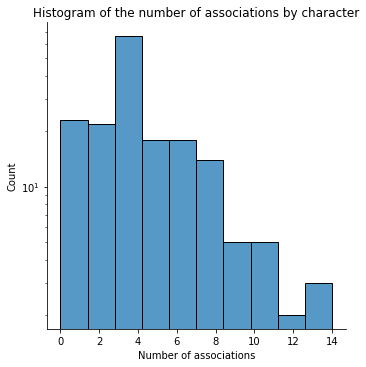

In [42]:
sns.displot(df_hp_chars['nb_associations'], log=(True,True))
plt.title("Histogram of the number of associations by character")
plt.xlabel("Number of associations")
plt.show()

We can see that the maximal number of association for one character is much lower than the maximal number of interaction for one character. We will now see what are the different associations and how many they are. Since one of our visualation will be a graph exploring these associations, it will be important to get insights about them

In [43]:
all_assoc = set()
for index, value in df_hp_chars['associated_groups'].items():
    all_assoc = all_assoc.union(set(value))

In [44]:
all_assoc, len(all_assoc)

({'',
  'Abbott family',
  'Acolytes',
  'Advance Guard',
  'Albus Dumbledore',
  'Albus Potter',
  'Algie (formerly)',
  'Apothecarium of Horace E. F. Slughorn',
  'Argus Filch (owner)',
  'Auror Department',
  'Auror Department (formerly)',
  'Auror Office',
  'Auror Office (formerly)',
  'Bagman family',
  'Bagshot family',
  'Bartemius Crouch Junior',
  'Bartemius Crouch Senior',
  'Beast Division',
  'Beauxbatons Academy of Magic',
  'Bell family',
  'Binns family',
  'Black family (formerly)',
  'Bones family',
  'Boot family',
  'Borgin and Burkes',
  'British Ministry of Magic',
  'British Ministry of Magic (formerly)',
  'British Ministry of Magic (only under his control)',
  'Brown family',
  'Bulgarian National Quidditch team',
  'Bulstrode family',
  'Carrow family',
  'Catholic Church (formerly)',
  'Cattermole family',
  'Chang family',
  'Chudley Cannons',
  'Circle of Khanna',
  'Circus Arcanus (formerly)',
  'Clearwater family',
  'Corner family',
  'Council of Magical

WOWOW ! We can see that there are much more association than expected... We will need to come up with a way of removing the less important ones. Doing it by hand like earlier seems to be really hard. Instead, what we will do is to compute the number of characters appearing in each association, 

In [45]:
# get the series with all associations for each cahracter
series_assoc_by_char = df_hp_chars['associated_groups'].apply(pd.Series).stack()
series_assoc_by_char.head(5)

/var/folders/vf/btrykr5n65v_k_lwb61317k80000gn/T/ipykernel_91043/2032238628.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_assoc_by_char = df_hp_chars['associated_groups'].apply(pd.Series).stack()


0  0                             Rubeus Hagrid
   1       Forbidden Forest Acromantula colony
1  0                Wimbourne Wasps (formerly)
   1                 British Ministry of Magic
   2    Department of Magical Games and Sports
dtype: object

In [46]:
# get dummies with all the previously created series 
dum = pd.get_dummies(series_assoc_by_char)
dum.head(5)

Abbott family  Acolytes  Advance Guard  Albus Dumbledore  \
0 0  0              0         0              0                 0   
  1  0              0         0              0                 0   
1 0  0              0         0              0                 0   
  1  0              0         0              0                 0   
  2  0              0         0              0                 0   

     Albus Potter  Algie (formerly)  Apothecarium of Horace E. F. Slughorn  \
0 0             0                 0                                      0   
  1             0                 0                                      0   
1 0             0                 0                                      0   
  1             0                 0                                      0   
  2             0                 0                                      0   

     Argus Filch (owner)  Auror Department  ...  Weasley family  \
0 0                    0                 0  ...               0   
  1                    0                 0  ...               0   
1 0                    0                 0  ...               0   
  1                    0                 0  ...               0   
  2                    0                 0  ...               0   

     Weasley family (as Scabbers) (formerly)  Weasleys' Wizard Wheezes  \
0 0                                        0                         0   
  1                                        0                         0   
1 0                                        0                         0   
  1                                        0                         0   
  2                                        0                         0   

     Werewolf army  Wimbourne Wasps (formerly)  Witch Weekly  Wizengamot  \
0 0              0                           0             0           0   
  1              0                           0             0           0   
1 0              0                           1             0           0   
  1              0                           0             0           0   
  2              0                           0             0           0   

     Wizengamot (formally)  Zabini family  nationality = Welsh  
0 0                      0              0                    0  
  1                      0              0                    0  
1 0                      0              0                    0  
  1                      0              0                    0  
  2                      0              0                    0  

[5 rows x 237 columns]

In [47]:
# Group by index
dum = dum.groupby(level=0)

In [48]:
# Sum all the association for a given given character
dum = dum.sum()
dum.head(5)

,,Abbott family,Acolytes,Advance Guard,Albus Dumbledore,Albus Potter,Algie (formerly),Apothecarium of Horace E. F. Slughorn,Argus Filch (owner),Auror Department,...,Weasley family,Weasley family (as Scabbers) (formerly),Weasleys' Wizard Wheezes,Werewolf army,Wimbourne Wasps (formerly),Witch Weekly,Wizengamot,Wizengamot (formally),Zabini family,nationality = Welsh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Sum the association over the axis 0 to get the count for each association
dum = dum.sum(axis=0)
dum.value_counts().sort_index()

1      149
2       34
3       17
4       11
5        4
6        3
8        2
9        2
10       1
11       1
12       2
13       1
14       3
17       1
21       2
32       1
37       1
38       1
110      1
dtype: int64

The visualisation we want to make between the characters is some kind of network with connections among characters. If time permits it, we would also want to be able to filter by association by highlighting the link between characters in the same association. For this to make sense and to look good, we choose to keep only the association with a number of characters >= 8. This represent around 20 associations which is enough to see interesting things in our opinion. Let's now see which associations are included in the chosen subset. 

In [50]:
dum[dum > 7].sort_values()

Advance Guard                                   8
Department of Magical Law Enforcement           8
Slug Club                                       9
Prewett family                                  9
Death Eaters                                   10
Albus Dumbledore                               11
Potter family                                  12
Hufflepuff                                     12
Harry Potter                                   13
Lord Voldemort                                 14
Weasley family                                 14
Gryffindor Quidditch team                      14
Ravenclaw                                      17
British Ministry of Magic                      21
Slytherin                                      21
Dumbledore's Army                              32
Gryffindor                                     37
Order of the Phoenix                           38
Hogwarts School of Witchcraft and Wizardry    110
dtype: int64

Although this was expected, we can see that among the most "popular" associations we get are the Hogwarts school and its houses, then come the Order of the Phoenix and Dumbledore's army. 

We now get the associations name and remove association that do not appear in the above list from the original dataframe.  

In [51]:
retain_assoc = list(dum[dum > 7].index)

In [52]:
def remove_not_in_list(cur, ret):
    return [x for x in cur if x in ret]

In [53]:
df_hp_chars['associated_groups'] = df_hp_chars['associated_groups'].apply(lambda x: remove_not_in_list(x, retain_assoc))
# Recompute the number of associations since we filter some of them 
df_hp_chars['nb_associations'] = df_hp_chars['associated_groups'].apply(lambda x: 0 if np.nan == x else len(x))
df_hp_chars['nb_associations'].value_counts()

2     43
0     39
3     31
1     25
4     16
5     10
7      4
6      3
9      3
11     1
8      1
Name: nb_associations, dtype: int64

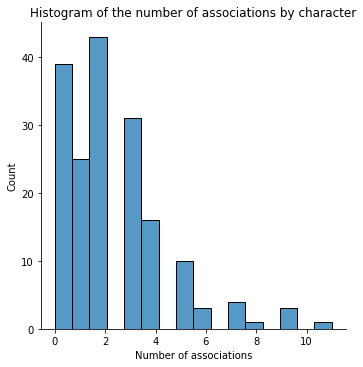

In [54]:
sns.displot(df_hp_chars['nb_associations'])
plt.title("Histogram of the number of associations by character")
plt.xlabel("Number of associations")
plt.show()

We can see that this reduction operation had the effect of removing 40 characters from the association graph and it will probably make our visualisation even more readable.

In [55]:
df_hp_chars['image_name'] = df_hp_chars.apply(lambda x: x['name'].lower().replace(' ','_').replace('.','').replace(',','').replace('"','').replace('(','').replace(')',''),axis=1)
                                              

In [56]:
df_hp_chars.to_json(cleaned_folder+"selected_chars.json",orient="records")

In [57]:
df_hp_chars.to_csv(cleaned_folder+"selected_chars.csv")

#### Spells

What is the first object coming to mind when we talk about magic ? Probably the wands and the spells which are the most magical things. Let's now analyse what type of spells can the wands launch. We have at our disposal a complete dataset collecting a lot of spells that can be cast by Harry Potter world wizards. 

In [58]:
df_spell = pd.read_json(hpcollection_folder+"spells.json") 
df_spell.head()

,id,name,other_name,pronunciation,spell_type,description,mention,etymology,note
0,1,Aberto,None,Ah-bare-toh,Charm,None,None,None,None
1,2,Accio,Summoning Charm,"Various, including: AK-ee-oh or AK-see-oh , AK...",Charm,Summons an object towards the caster. It is ab...,Harry Potter summoned his broom to complete th...,"The Latin word accio means ""I call"" or ""I summ...",None
2,3,Age Line,None,None,Charm,Prevents people above or below a certain age f...,None,None,None
3,4,Aguamenti,Water-Making Spell,AH-gwah-MEN-tee,"Charm, Conjuration","Produces a clean, drinkable jet of water from ...",Used by Fleur Delacour in 1994 to extinguish h...,None,None
4,5,Alarte Ascendare,None,a-LAR-tay a-SEN-der-ay,Charm,Shoots the target high into the air.,Used by Gilderoy Lockhart in 1992 to send a sn...,None,None


We are most interested in the incantantion (since it is used by witch/wizard to cast them) of the spell as well as the spell type. We will therefore drop most of the columns from the dataset. The only ones we will keep are:
- name (since we will need it for the visualisation and we will probably compute stats with them).
- description which could be nice to display as a hover information.
- pronunication in case of we want to use some text to speech application in our visualisation (not a prioritiy though).
- spell_type which is the main thing we will use for visualisation and what we will explore right now.

In [59]:
df_spell = df_spell.drop(['note', 'other_name', 'mention', 'etymology','id'], axis=1)
df_spell.head()

,name,pronunciation,spell_type,description
0,Aberto,Ah-bare-toh,Charm,None
1,Accio,"Various, including: AK-ee-oh or AK-see-oh , AK...",Charm,Summons an object towards the caster. It is ab...
2,Age Line,None,Charm,Prevents people above or below a certain age f...
3,Aguamenti,AH-gwah-MEN-tee,"Charm, Conjuration","Produces a clean, drinkable jet of water from ..."
4,Alarte Ascendare,a-LAR-tay a-SEN-der-ay,Charm,Shoots the target high into the air.


In [60]:
len(df_spell)

305

We can see that we have in total 305 different castable spell in Harry Potter. J.K. Rowling really has a lot of imagination. We will now see if we can easily split them into differnt spell categories or if this requires some additional work

In [61]:
df_spell['spell_type'].value_counts()

Charm                         157
Jinx                           30
Transfiguration                26
Curse                          25
Hex                            21
Spell                          10
Conjuration                     7
Healing Spell                   3
Transfiguration, Jinx           2
Dark Arts                       2
Charm, Conjuration              2
Counter-Jinx                    1
Untransfiguration               1
Counter-Charm                   1
Dark charm                      1
Counter-charm                   1
Curse, Jinx                     1
Jinx, Transfiguration           1
Conjuration, Dark Arts          1
Counter-Spell                   1
Conjuration, Healing spell      1
Charm, Healing Spell            1
Conjuration, Charm              1
Transportation                  1
Healing Spell, Vanishment       1
Vanishment                      1
Name: spell_type, dtype: int64

Indeed, we have a lot mroe categories than expected. By inspecting the data (by hand), we saw that most of the spells that are classified as two types are spells almost not used in the sage. For this reason as well as the fact that they represent a negligible part of the dataset, we will remove them from our visualisation. 

In [62]:
df_spell['name'] = df_spell['name'].apply(lambda x:x.lower())
df_spell = df_spell[df_spell['spell_type'].isin(['Healing Spell', 'Conjuration ', 'Spell', 'Hex', 'Curse', 'Transfiguration', 'Charm'])].reset_index(drop=True)
df_spell.head(10)

,name,pronunciation,spell_type,description
0,aberto,Ah-bare-toh,Charm,None
1,accio,"Various, including: AK-ee-oh or AK-see-oh , AK...",Charm,Summons an object towards the caster. It is ab...
2,age line,None,Charm,Prevents people above or below a certain age f...
3,alarte ascendare,a-LAR-tay a-SEN-der-ay,Charm,Shoots the target high into the air.
4,albus dumbledore's forceful spell,None,Spell,"This spell was, supposedly, quite powerful as ..."
5,alohomora,ah-LOH-ho-MOR-ah,Charm,Unlocks doors and other objects. It can also u...
6,amato animo animato animagus,ah-MAH-toh ah-NEE-moh ah-nee-MAH-toh an-a-MAY-jus,Transfiguration,Spell used as part of the process of becoming ...
7,anteoculatia,an-tee-oh-kyoo-LAY-chee-ah,Hex,Causes the target to grow antlers.
8,anti-cheating spell,None,Charm,Used to prevent cheating.
9,antonin dolohov's curse,None,Curse,An unknown curse that causes injuries that are...


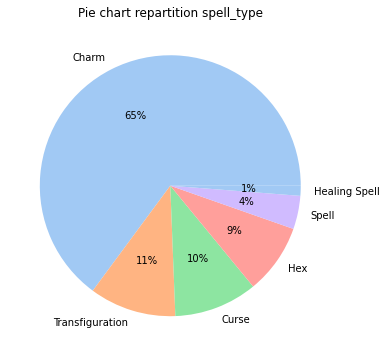

In [63]:
plot_pie(df_spell, 'spell_type')

We can that our dataset is biased toward charm spell. Nevertheless, our idea of visualisation integrating the spell will force us to measure the importance of each spell in the book. This leads us to the Harry Potter book dataset. This dataset contains the full text of each book. We will therefore iterate over all the 

#### Most popular spells

In [64]:
occ = {}
spells = set()
for i, v in df_spell['name'].items():
    occ[v.lower()]= 0
    spells.add(v.lower())

In [65]:
# iterate over the 7 books
for i in range(1,8):
    # Read the full book line by line in the a list
    with open(hpbooks_folder+f"hp{i}.txt") as f:
        lines = f.readlines()

    # Iterate over the lines and check for every spell if it appears in that line. 
    for line in lines:
        cur = line.lower()
        for sp in spells: 
            count = cur.count(sp) 
            if count > 0:
                occ[sp] = occ[sp] +count

In [66]:
# Create a dataframe with the name of the spell and the count
most_famous = pd.DataFrame.from_dict(occ,orient='index',columns=['count']).reset_index().rename(columns={'index':'name'})
most_famous.head()

,name,count
0,aberto,0
1,accio,34
2,age line,8
3,alarte ascendare,0
4,albus dumbledore's forceful spell,0


In [67]:
# Merge the two dataframes together
df_spell = df_spell.merge(most_famous, left_on='name', right_on='name')
df_spell.head(1)

,name,pronunciation,spell_type,description,count
0,aberto,Ah-bare-toh,Charm,None,0


In [68]:
df_spell[df_spell['count']>1].shape

(64, 5)

As explained earlier, one of our visualisation will probably be some kind of Sankey diagram mapping the most used spell to their type. Let's now extract the top 20 spells sorted by count. For the purpose of the visualisation, we will only keep the top 20 spell that have a pronunciation as it is also an indication of their importance in the saga and we can avoid the fact that some of them appear in the text by chance without being effectively cast. Furthermore, the spell pack is almost unknown in the saga but the substring will appear a lot throughout the books, so we can safely remove it. 

In [87]:
# Remove the spell without specified pronunciation and take the 20 largest. 
df_spell = df_spell[df_spell['pronunciation'].apply(lambda x: x is not None)]
df_spell.nlargest(90, 'count')

,name,pronunciation,spell_type,description,count
1,accio,"Various, including: AK-ee-oh or AK-see-oh , AK...",Charm,Summons an object towards the caster. It is ab...,34
78,expecto patronum,ecks-PECK-toh pah-TROH-numb,Charm,This charm is a highly powerful and advanced p...,29
79,expelliarmus,ex-PELL-ee-ARE-muss,Charm,Forces whatever an opponent is holding to fly ...,27
214,stupefy,STOO-puh-fye,Charm,"Stuns the target, rendering them unconscious.",27
136,lumos,LOO-mos,Charm,"Illuminates the tip of the caster's wand, allo...",22
...,...,...,...,...,...
41,circumrota,SIR-cum-roh-tuh,Charm,Rotates objects.,0
42,cistem aperio,SIS-tem uh-PE-ree-o,Charm,Opens chests and boxes.,0
44,colloshoo,CAWL-low-shoo,Hex,Sticks the target's shoes to the ground.,0
45,colovaria,co-loh-VA-riah,Charm,Changes the target's colour.,0


Unfortunately, we can see that the categories other than charm and curse are not present in the top-20 spells. It is a shame but we will do the visualisation as it exposes an interesting as well as an extremly important point in the Harry Potter series. In the previous exploration, we try to spell appearing in the book. In the next cell, we simply save the modified dataframe for later uses.


In [70]:
df_spell.to_json( cleaned_folder+"spell.json", orient='index')

### Movie Datasets

The last step of this data exploration part is the movie dataset. As its name suggests, it contains a lot of information about the movie such as the budget, box-offices or title and length of the movie. Furthermore, it contains the whole transcrpit of each of the Harry Potter movie. For now, we did not plan to use that part of the dataset but it might become necessary if we want to explore characteristic of the characters in each movie. 

In our visualisation, the data provided by this dataset will probably be used in the introduction part of the visualiation for the moment. Let's start by observing the budget granted to each movie and see how much it produces at the box-office. Then, we will check the length of the movies to see if there is a trend for the movies to last longer or to be shorter. 

Since those are value specific to each movie, we choose to do a bar-plot rather than a histogram. The fact that we have only 8 movies at our disposal reinforces this choice as everything will stay readable with the abrs. 

In [71]:
df_movies = pd.read_csv(movies_folder+"movies.csv", sep=';')
df_movies.head()

,movie,released_year,running_time,budget,box_office,file
0,Harry Potter and the Philosopher's Stone,2001,152,125000000,1002000000,hp1.csv
1,Harry Potter and the Chamber of Secrets,2002,161,100000000,880300000,hp2.csv
2,Harry Potter and the Prisoner of Azkaban,2004,142,130000000,796700000,hp3.csv
3,Harry Potter and the Goblet of Fire,2005,157,150000000,896400000,hp4.csv
4,Harry Potter and the Order of the Phoenix,2007,138,150000000,942000000,hp5.csv


Let's save it to json for convenience for later use during the development of the visualisation.

In [72]:
df_movies.to_json("../data/movies/movies.json", orient='index')

In [73]:
def plot_columns_bar(df, col):
    """
    Plot a bar plot for the given column in the given dataframe
    Parameters:
    -----------
        - df : the dataframe containing the data
        - col: The column for which to make the bar plot
    Returns:
    -----------
    """
    g = sns.barplot(data=df, x='movie', y=col)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

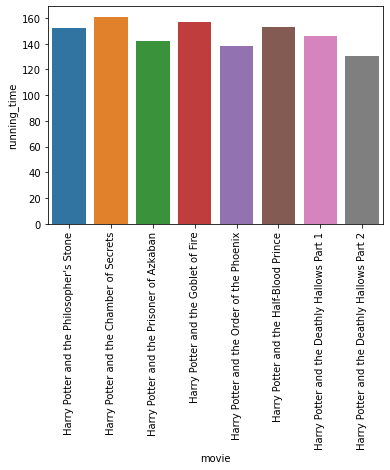

In [74]:
plot_columns_bar(df_movies, 'running_time')

It might be interesting to compare the length of the movie with the corresponding book length. Below we provide the number of pages of each book:
- Harry Potter and the Sorcerer’s Stone – 309 pages
- Harry Potter and the Chamber of Secrets – 341 pages
- Harry Potter and the Prisoner of Azkaban – 435 pages
- Harry Potter and the Goblet of Fire – 734 pages
- Harry Potter and the Order of the Phoenix – 870 pages
- Harry Potter and the Half-Blood Prince – 652 pages
- Harry Potter and the Deathly Hallows – 759 pages

It is interesting to see that the producer created longer movies for the shortest book (Sorcerer's stone and Chamber of Secret) whereas larger books are constrained to a shorter movie (e.g. Order of the Phoenix which is the biggest book has the second shortest movie). This is probably due to the fact that the first books have a manageable size and therefore it was possible to include almost all the story in the movie. Since the size of the books increase with the number of movies, the producer of the latests movies had to make some choices and to delete some of the scenes. Nevertheless, it is suprising to see how the length of the movie decreased instead of staying at the same level.


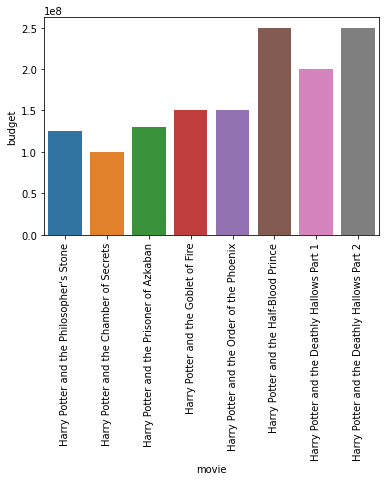

In [75]:
plot_columns_bar(df_movies, 'budget')

We can see that the scale of the $y$ axis is on the hundreds of milions. We can also see that the budget increases as we advance in the saga. We go from 125M for the first movie to 250 M for the 6th and the last one. Another interseting comment is that the budget is not related to the length of the movie. We previously saw that Harry Potter and the Deathly Hallows part 8 is the shortest movie but also have one of the highest budget. Similarly, Harry Potter and the Chamber of secret is the longest movie but the one having the smallest budget.

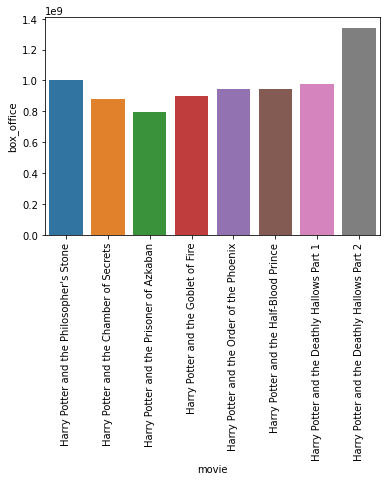

In [76]:
plot_columns_bar(df_movies, 'box_office')

In the above plot, we can see that even though the budget per movie is increasing for each movie, the box-office, in the other hand, seems to be stable for the seven first movies beween 900M and 1B of revenue. It is only for the last movie that people were excited and scores exploded, with a record breaker (for the saga) box-office of ~1.4B.

## Conclusion
In this exploratory data analysis, we explore in depth each of the dataset we had and we perform necessary cleaning. With these first steps done, we think that it will be easier for us to build the datastructure necessary to make our visualisations. 